In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

plt.style.use(['dark_background'])

# Data Exploration

In [3]:
os.listdir('data/Stocks')[:3]

['trvn.us.txt', 'catb.us.txt', 'clr.us.txt']

In [4]:
def label_columns(ticker):
    df = pd.read_csv(f'data/Stocks/{ticker}.us.txt',
                     header=0, parse_dates=[0], date_parser=date_time_parser)
    df = df.rename(columns={"Open": f"Open_{ticker}",
                            "High": f"High_{ticker}",
                            "Low": f"Low_{ticker}",
                            "Close": f"Close_{ticker}",
                            "Volume": f"Volume_{ticker}"})
    return df


def date_time_parser(x):
    return datetime.datetime.strptime(x, '%Y-%m-%d')

In [ ]:
def date_time_parser(x):
    return datetime.datetime.strptime(x, '%Y-%m-%d')
df = pd.read_csv(f'data/Stocks/{ticker}.us.txt', header=0, parse_dates=[0], date_parser=date_time_parser)

In [5]:
aapl_df = label_columns('aapl')
aapl_df.head(3)

,Date,Open_aapl,High_aapl,Low_aapl,Close_aapl,Volume_aapl,OpenInt
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0


In [6]:
msft_df = label_columns('msft')
msft_df.head(3)

,Date,Open_msft,High_msft,Low_msft,Close_msft,Volume_msft,OpenInt
0,1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,0
1,1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,0
2,1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,0


In [7]:
main_df = pd.concat([aapl_df.set_index('Date'), msft_df.set_index('Date')],axis=1).dropna()

In [8]:
main_df.reset_index(level=0, inplace=True)

Assuming a 70/30 split, plot a graph of Apple stock prices from 2004 onwards and draw a line delineating where our train/test set begins/ends

In [9]:
main_df = main_df[-3650:]
main_df.iloc[3650-1095]

Date           2013-07-11 00:00:00
Open_aapl                   55.326
High_aapl                   56.018
Low_aapl                    55.094
Close_aapl                  55.895
Volume_aapl            8.90916e+07
OpenInt                          0
Open_msft                   31.273
High_msft                   31.962
Low_msft                    31.184
Close_msft                  31.889
Volume_msft            6.00227e+07
OpenInt                          0
Name: 6886, dtype: object

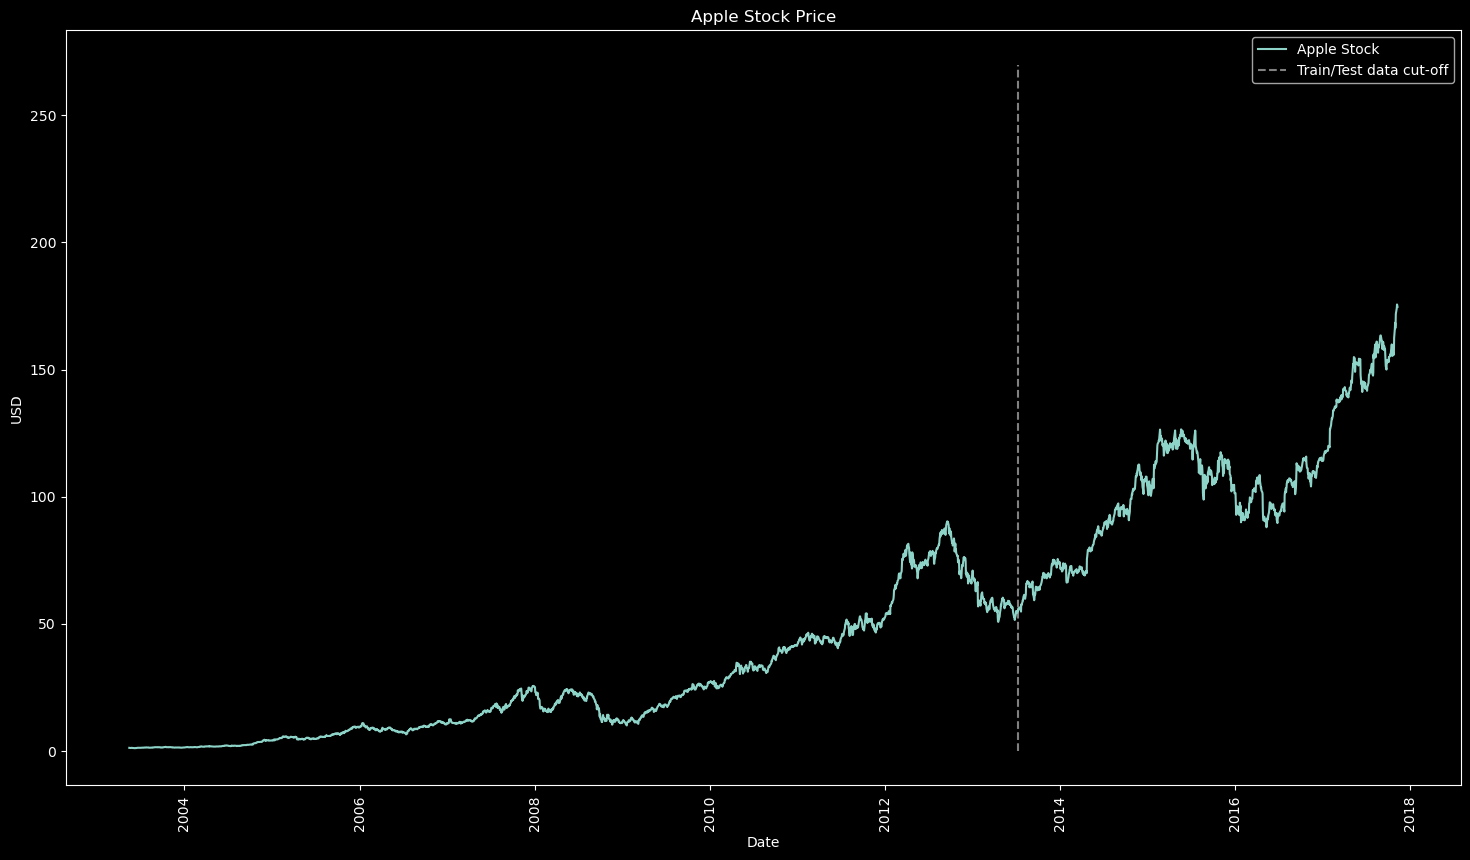

In [10]:
plt.figure(figsize=(18,10), dpi=100)
plt.plot(main_df['Date'], main_df['Close_aapl'], label='Apple Stock')
plt.xlabel('Date')
plt.ylabel('USD')
plt.vlines(datetime.date(2013,7, 11), 0, 270, linestyles='--', colors='gray', label='Train/Test data cut-off')

plt.xticks(rotation=90)
plt.title('Apple Stock Price')
plt.legend()
plt.show()

Calculate how many training/test days there are with a 70/30 split

In [11]:
num_training_days = int(main_df.shape[0]*.7)
print('Number of training days: {}. Number of test days: {}.'.format(num_training_days, \
                                                                    main_df.shape[0]-num_training_days))

Number of training days: 2555. Number of test days: 1095.


# Lesson Notes

1. Pandas, creating dataframes
1. Matplotlib, creating plots

# Technical Indicators

Calculate on close price of Apple the:
1. Moving average with a 7 day spanning window
1. Moving average with a 21 day spanning window
1. Exponentially weighted moving average with a 26 day window
1. Exponentially moving average with a 12 day window
1. Moving Average Convergence Divergence (MACD)
1. Rolling standard deviation with a 20 day window
1. Upper Bollinger band & lower Bollinger band
1. Exponential moving average with a the decay term set to 0.5

In [12]:
def get_technical_indicators(dataset, counter_str):
    dataset['ma7'] = dataset[counter_str].rolling(window=7).mean()
    dataset['ma21'] = dataset[counter_str].rolling(window=21).mean()

    dataset['26ema'] = dataset[counter_str].ewm(span=26).mean()
    dataset['12ema'] = dataset[counter_str].ewm(span=12).mean()
    dataset['MACD'] = (dataset['12ema'] - dataset['26ema'])

    dataset['20sd'] = dataset[counter_str].rolling(20).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd'] * 2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd'] * 2)

    dataset['ema'] = dataset[counter_str].ewm(com=0.5).mean()
    return dataset

In [13]:
dataset_TI_df = get_technical_indicators(main_df, 'Close_aapl')

In [14]:
dataset_TI_df.tail(5)

,Date,Open_aapl,High_aapl,Low_aapl,Close_aapl,Volume_aapl,OpenInt,Open_msft,High_msft,Low_msft,...,OpenInt,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema
7976,2017-11-06,171.75,174.36,171.10,173.63,34901241.0,0.0,84.20,84.700,84.0825,...,0.0,168.047143,160.436667,161.337489,165.144058,3.806569,6.062250,172.561167,148.312166,172.525132
7977,2017-11-07,173.29,174.51,173.29,174.18,24424877.0,0.0,84.77,84.900,83.9300,...,0.0,169.720000,161.336667,162.288786,166.534203,4.245416,6.624148,174.584963,148.088370,173.628377
7978,2017-11-08,174.03,175.61,173.71,175.61,24451166.0,0.0,84.14,84.610,83.8300,...,0.0,171.075714,162.301905,163.275543,167.930479,4.654936,7.173915,176.649734,147.954075,174.949459
7979,2017-11-09,174.48,175.46,172.52,175.25,29533086.0,0.0,84.11,84.270,82.9000,...,0.0,172.050000,163.219048,164.162540,169.056559,4.894020,7.491320,178.201688,148.236407,175.149820
7980,2017-11-10,175.11,175.38,174.27,174.67,25130494.0,0.0,83.79,84.095,83.2300,...,0.0,173.247143,164.134762,164.940870,169.920166,4.979296,7.679388,179.493538,148.775986,174.829940


Plot on the same graph 2 figures, one containing the:
1. 7 day rolling moving average
1. Closing price
1. 21 day rolling moving average
1. Upper Bollinger band
1. Lower Bollinger band

And another containing the MACD

Over the last 400 days on the dataset

In [15]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)
    
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['Close_aapl'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators for Apple - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()

    # Plot second subplot
    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
    plt.legend()
    plt.show()

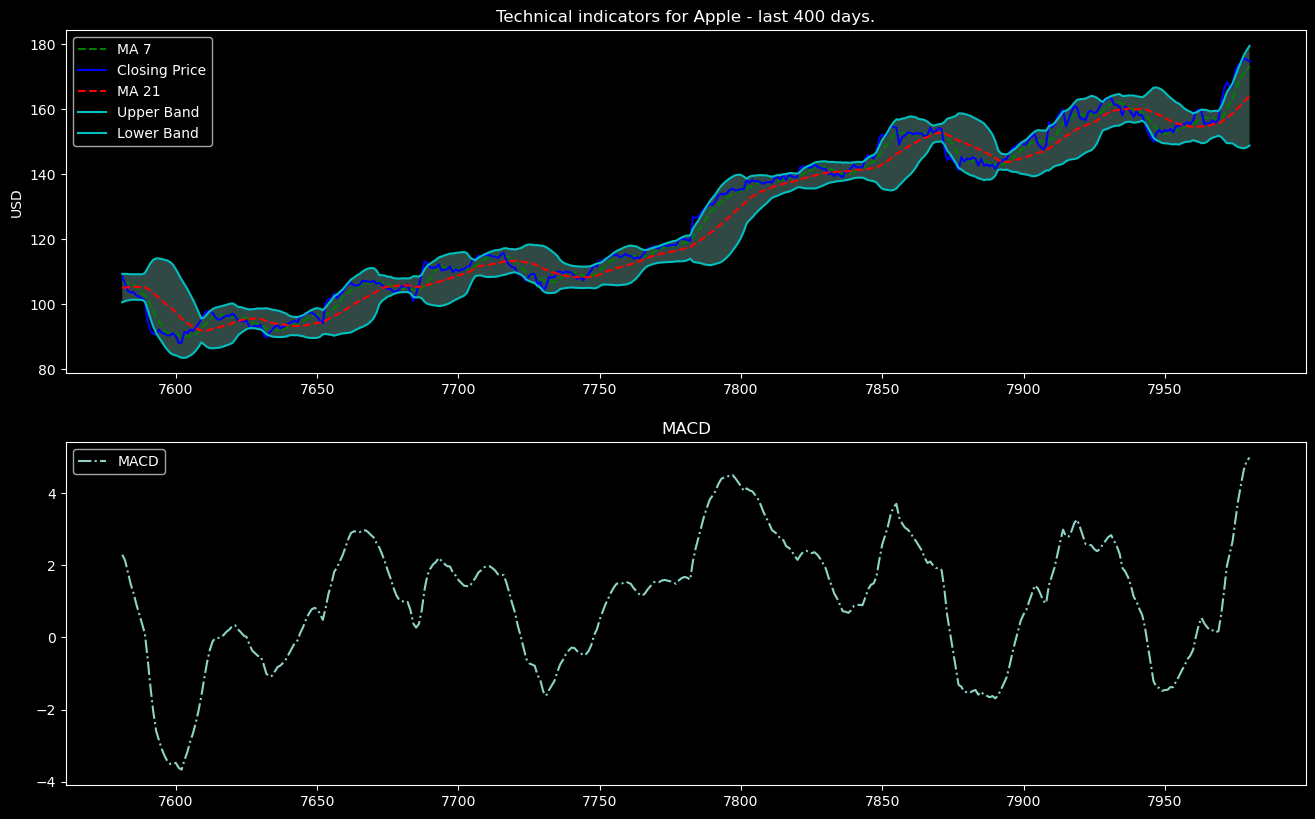

In [16]:
plot_technical_indicators(dataset_TI_df, 400)

# Diagnostics

1. Conditional heteroscedacity
1. Multicolinearity
1. Serial correlation

In [28]:
import statsmodels as sms
import scipy.stats as scs
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.graphics.gofplots import qqplot

In [29]:
def tsplot(y, lags=None, figsize=(15, 10), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return

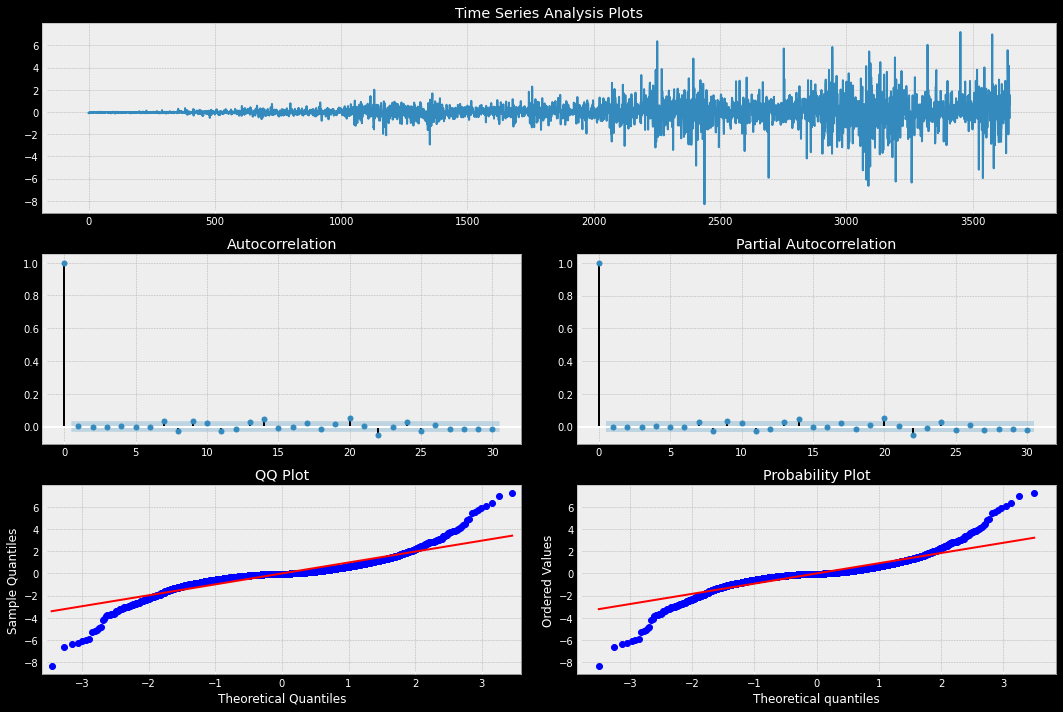

In [30]:
tsplot(model_fit.resid, lags=30)

In [31]:
?qqplot

<strong>What is partial autocorrelation VS autocorrelation?</strong>

- Autocorrelation is the correlation between $y$ and $x_1$, $y$ and $x_2$, $y$ and $x_3$...etc
- Partial correlation is correlation between $y$ and $x_1$ that is not explained by their common correlation by $x_2$ and $x_3$. This can be computed as the reduction in variance achieved by adding $x_1$ to the regression of $y$ on $x_2$ and $x_3$

<strong>What is a QQ plot?</strong>
This is a plot to see if a series of data comes from a common distribution

# ARIMA

## Is the data stationary?

Autocorrelation is the correlation of a signal with a delayed copy — or a lag — of itself as a function of the delay. When plotting the value of the ACF for increasing lags (a plot called a correlogram), the values tend to degrade to zero quickly for stationary time series (see figure 1, right), while for non-stationary data the degradation will happen more slowly.

1. This is a plot of how much autocorrelation is found at varying levels of lag. 
1. Levels above the dashed lines are considered significant. So, uncorrelated series are closer to 0.
1. The curve is not satisfically significant for lags between 5 - 25 during 10/11/17 and 02/10/17 

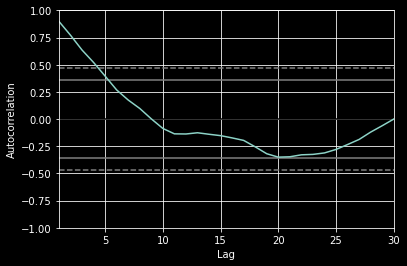

<Figure size 720x504 with 0 Axes>

In [19]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series[-30:])
plt.figure(figsize=(10,7))
plt.show()

In [17]:
from statsmodels.tsa.arima_model import ARIMA

series = main_df['Close_aapl']
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()

In [18]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Close_aapl   No. Observations:                 3649
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5118.802
Method:                       css-mle   S.D. of innovations              0.984
Date:                Thu, 30 Jul 2020   AIC                          10251.604
Time:                        16:41:56   BIC                          10295.020
Sample:                             1   HQIC                         10267.066
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0475      0.016      2.887      0.004       0.015       0.080
ar.L1.D.Close_aapl     0.0283      0.017      1.709      0.087      -0.004       0.061
ar.L2.D.Close_aapl  

1. coeff: this is the coefficient for each AR term (ie. $\alpha_{t-i}$)
1. std error: if the experiment was done many times with the same distribution residuals, how would the error be distributed? (ie. with a similar distribution of residuals, how different would my parameters be). This is is called "standard" error because it is expressed in terms of the standard deviation or estimate of the second moment.  
1. $P|z|$ : this is a t-test - performed on each term VS $\hat{y}$ - ie. significance of the term $x_t$ affecting y
    $$
    F = \frac {\Delta \sigma^2(y) \text{ due to }x_t}  {\Delta \sigma^2(y) \text{ not due to }x_t} 
      = \frac {(SS_{mean} - SS_{fit}) / (p_{fit} - p_{mean})} {SS_{fit} / (n - p_{fit})}
    $$
1. If $F$ is large, then $p$ will be low - you can plot a histogram of values with bootstrapping with replacement 
1. Notice the difference between $F$ & $R^2$:
    $$
    R^2 =  \frac {SS_{mean} - SS_{fit}} {SS_{mean}}
    $$
1. 0.025 & 0.975 : coefficient value +- some bit of the standard error
1. If the Modulus is >1 then the data is stationary

What are p, q, d:
1. p is the number of autoregressive terms,
1. d is the number of nonseasonal differences needed for stationarity, and
1. q is the number of lagged forecast errors in the prediction equation.

In [23]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

Using sklearn.metrics and statsmodels.tsa, fit an ARIMA model, forecast the output and calculate the mean squared error 

In [24]:
X = series.values
size = int(len(X) * 0.7)
train, test = X[:size], X[size:]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y_hat = output[0]
    predictions.append(y_hat)
    obs = test[t]
    history.append(obs)

test_error = mean_squared_error(test, predictions)
print(f"Test MSE: {test_error}\n")

Test MSE: 2.2740817844342747



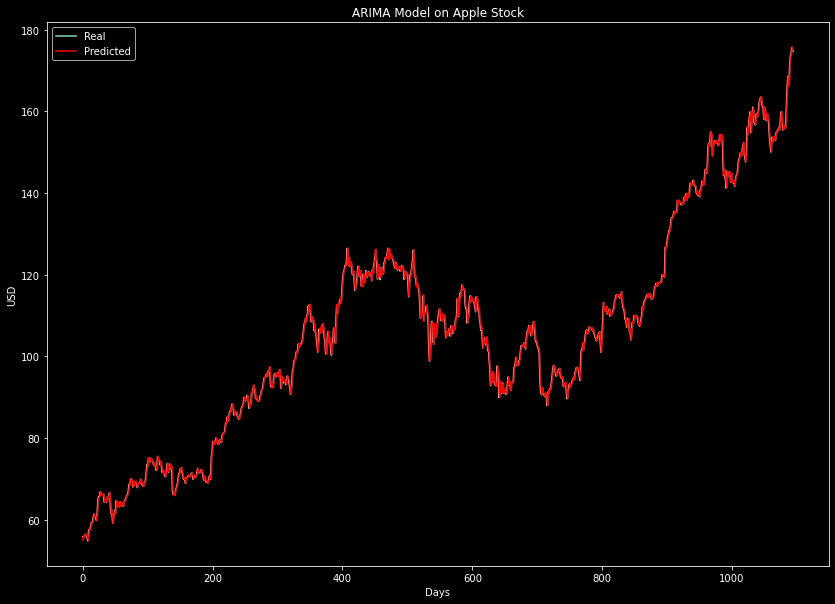

In [25]:
plt.figure(figsize=(14,10))
plt.plot(test, label='Real')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('ARIMA Model on Apple Stock')
plt.legend()
plt.show()

In [27]:
dataset_TI_df['arima_preds'] = history